<h1>Bible Reader</h1>
<p>Gregory Antell</p>
<p>July 2017</p>

# Import requirements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read in Bible data

In [4]:
bible_df = pd.read_csv('./bible-verses-from-king-james-version.zip')
bible_df.head()

,citation,book,chapter,verse,text
0,Genesis 1:1,Genesis,1,1,In the beginning God created the heaven and th...
1,Genesis 1:2,Genesis,1,2,"And the earth was without form, and void; and ..."
2,Genesis 1:3,Genesis,1,3,"And God said, Let there be light: and there wa..."
3,Genesis 1:4,Genesis,1,4,"And God saw the light, that it was good: and G..."
4,Genesis 1:5,Genesis,1,5,"And God called the light Day, and the darkness..."


# Assess corpus size

In [5]:
def character_counter(string):
    """
    return the number of characters in a string
    """
    return len(string)

def word_counter(string):
    """
    returns the number of words in a string
    """
    return len(string.split())


In [6]:
# total books
print "Total books:", len(set(bible_df['book']))

# total chapters
total_chapters = 0
for book_name, book in bible_df.groupby('book', sort=False):
    chapters = len(set(book['chapter']))
    total_chapters += chapters
print "Total chapters:", total_chapters

# total verses
print "Total verses:",bible_df.shape[0]

Total books: 66
Total chapters: 1189
Total verses: 31102


In [12]:
chapter_dict = {'book':[], 'chapter':[], 'char_count':[], 'word_count':[], 'text':[]}

for book_name, book_df in bible_df.groupby('book', sort=False):
    for chapter_name, chapter_df in book_df.groupby('chapter', sort=False):
        chapter_text_0 = ' '.join(list(chapter_df['text']))
        chapter_text_1 = chapter_text_0.replace('\n','')
        chapter_text = chapter_text_1.strip(' ')
        # calculate character and word counts
        char_count = character_counter(chapter_text)
        word_count = word_counter(chapter_text)
        # append information to dictionary at the chapter level
        chapter_dict['book'].append(book_name)
        chapter_dict['chapter'].append(chapter_name)
        chapter_dict['char_count'].append(char_count)
        chapter_dict['word_count'].append(word_count)
        chapter_dict['text'].append(chapter_text)
        
chapter_df = pd.DataFrame(chapter_dict)
chapter_df.head()

,book,chapter,char_count,text,word_count
0,Genesis,1,4117,In the beginning God created the heaven and th...,797
1,Genesis,2,3119,"Thus the heavens and the earth were finished, ...",632
2,Genesis,3,3435,Now the serpent was more subtil than any beast...,695
3,Genesis,4,3235,"And Adam knew Eve his wife; and she conceived,...",632
4,Genesis,5,2781,This is the book of the generations of Adam. I...,505


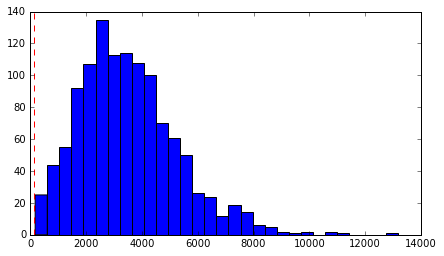

In [14]:
fig,ax = plt.subplots(figsize=(7,4))
ax.hist(chapter_df['char_count'], bins=30)
ax.axvline(x=140, ls='--', color='red')
plt.show()

In [18]:
chapter_df.to_csv('./KJB_chapters.csv',index=False)